<a href="https://colab.research.google.com/github/kenneth-003/Kiwanukakenneth/blob/main/Trial_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#nueral networks
fpath="/content/FeedGrains.csv"

In [3]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df=pd.read_csv(fpath)
display(df)

Unnamed: 0  \
3 Exports and imports 10 Byproduct feeds 190 174.0 Malaysia       76 Brewers' and distillers' dregs & waste 24 Exports, from U.S. to specified destination 7 1,000 metric tons 1992           3   
                                                                                                                                                                               1993           1   
                                                                                                                                                                               2003           3   
                                                                                                                                                                               2004           1   
                                                                                                                                                                               2004           1   
...                                                                                                                                                                                         ...   
                      12 Corn            204 187.0 China (Taiwan) 2  Corn                                   19 Imports, to U.S. from specified source      7 1,000 metric tons 2019           1   
2 Supply and use      12 Corn            204 187.0 China (Taiwan) 2  Corn                                   35 Exports, trade year                         7 1,000 metric tons 1991           3   
                                                                                                                                                                               1992           3   
3 Exports and imports 12 Corn            204 187.0 China (Taiwan) 11 Corn grain                             19 Imports, to U.S. from specified source      7 1,000 metric tons 2018           3   
                                                                                                                                                                               2019           1   

                                                                                                                                                                                      Annual  \
3 Exports and imports 10 Byproduct feeds 190 174.0 Malaysia       76 Brewers' and distillers' dregs & waste 24 Exports, from U.S. to specified destination 7 1,000 metric tons 1992   Annual   
                                                                                                                                                                               1993  Monthly   
                                                                                                                                                                               2003   Annual   
                                                                                                                                                                               2004  Monthly   
                                                                                                                                                                               2004  Monthly   
...                                                                                                                                                                                      ...   
                      12 Corn            204 187.0 China (Taiwan) 2  Corn                                   19 Imports, to U.S. from specified source      7 1,000 metric tons 2019  Monthly   
2 Supply and use      12 Corn            204 187.0 China (Taiwan) 2  Corn                                   35 Exports, trade year                         7 1,000 metric tons 1991   Annual   
                                                                                                                

In [9]:
df.columns

Index(['Unnamed: 0', 'Annual', '19', 'MY Jun-May', '0.109'], dtype='object')

In [10]:
df.shape

(72833, 5)

In [11]:
#cnn


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 72833 entries, (np.int64(3), 'Exports and imports', np.int64(10), 'Byproduct feeds', np.int64(190), np.float64(174.0), '          Malaysia', np.int64(76), "Brewers' and distillers' dregs & waste", np.int64(24), 'Exports, from U.S. to specified destination', np.int64(7), '1,000 metric tons', np.int64(1992)) to (np.int64(3), 'Exports and imports', np.int64(12), 'Corn', np.int64(204), np.float64(187.0), '          China (Taiwan)', np.int64(11), 'Corn grain', np.int64(19), 'Imports, to U.S. from specified source', np.int64(7), '1,000 metric tons', np.int64(2019))
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  72833 non-null  int64  
 1   Annual      72833 non-null  object 
 2   19          72833 non-null  int64  
 3   MY Jun-May  72833 non-null  object 
 4   0.109       72833 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.8+ MB


In [13]:
df.describe()

,Unnamed: 0,19,0.109
count,72833.000000,72833.000000,7.283300e+04
mean,1.482680,20.802686,7.016381e+02
std,0.855116,33.245207,1.107658e+04
min,1.000000,1.000000,1.000000e-06
25%,1.000000,4.000000,5.593406e-02
50%,1.000000,8.000000,1.000000e+00
75%,1.000000,12.000000,2.263600e+01
max,3.000000,114.000000,1.031504e+06


In [17]:
df.duplicated().sum()

np.int64(23076)

In [18]:
df.isna().sum()

,0
Unnamed: 0,0
Annual,0
19,0
MY Jun-May,0
0.109,0


In [19]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
#cnn
#target and the feature column



In [23]:
# Identify target and feature columns.
# The target column could be '0.109' (the numerical value)
# The feature columns would be the remaining columns.
target_column = '0.109'
feature_columns = [col for col in df.columns if col != target_column]

print(f"Target column: {target_column}")
print(f"Feature columns: {feature_columns}")

Target column: 0.109
Feature columns: ['level_0', 'level_1', 'level_2', 'level_3', 'level_4', 'level_5', 'level_6', 'level_7', 'level_8', 'level_9', 'level_10', 'level_11', 'level_12', 'level_13', 'Unnamed: 0', 'Annual', '19', 'MY Jun-May']


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df[feature_columns].copy() # Create a copy to avoid SettingWithCopyWarning
y = df[target_column]

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Scale numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Display the first few rows of the processed data
display(X.head())
display(y.head())

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,level_11,level_12,level_13,Unnamed: 0,Annual,19,MY Jun-May
0,0.210183,Exports and imports,-0.870325,Byproduct feeds,-0.906707,0.207625,Malaysia,1.16283,Brewers' and distillers' dregs & waste,0.272358,"Exports, from U.S. to specified destination",-0.295415,"1,000 metric tons",-0.939334,2.092327,Annual,0.867723,MY Sep-Aug
1,0.210183,Exports and imports,-0.870325,Byproduct feeds,-0.906707,0.207625,Malaysia,1.16283,Brewers' and distillers' dregs & waste,0.272358,"Exports, from U.S. to specified destination",-0.295415,"1,000 metric tons",-0.860336,-0.479287,Monthly,-0.306960,Jul
2,0.210183,Exports and imports,-0.870325,Byproduct feeds,-0.906707,0.207625,Malaysia,1.16283,Brewers' and distillers' dregs & waste,0.272358,"Exports, from U.S. to specified destination",-0.295415,"1,000 metric tons",-0.070353,2.092327,Annual,0.867723,MY Sep-Aug
3,0.210183,Exports and imports,-0.870325,Byproduct feeds,-0.906707,0.207625,Malaysia,1.16283,Brewers' and distillers' dregs & waste,0.272358,"Exports, from U.S. to specified destination",-0.295415,"1,000 metric tons",0.008645,-0.479287,Monthly,-0.551686,Feb
4,0.210183,Exports and imports,-0.870325,Byproduct feeds,-0.906707,0.207625,Malaysia,1.16283,Brewers' and distillers' dregs & waste,0.272358,"Exports, from U.S. to specified destination",-0.295415,"1,000 metric tons",0.008645,-0.479287,Monthly,-0.502741,Mar


,0.109
0,0.046
1,0.046
2,7.097
3,0.155
4,0.653


In [32]:
# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns

# Create a ColumnTransformer to apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough')

# Apply the preprocessor to X
X_processed = preprocessor.fit_transform(X)

In [33]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [34]:


# Get the number of input features after preprocessing
input_shape_processed = X_processed.shape[1]

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape_processed,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(),
              loss=MeanSquaredError(),
              metrics=[RootMeanSquaredError()])

model.summary()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │        22,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,025 (129.00 KB)

 Trainable params: 33,025 (129.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 201669520.0000 - root_mean_squared_error: 14072.5107 - val_loss: 273100416.0000 - val_root_mean_squared_error: 16525.7500
Epoch 2/10
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 128058040.0000 - root_mean_squared_error: 11104.7178 - val_loss: 260744160.0000 - val_root_mean_squared_error: 16147.5742
Epoch 3/10
996/996 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 190289168.0000 - root_mean_squared_error: 13281.4639 - val_loss: 251490256.0000 - val_root_mean_squared_error: 15858.4443
Epoch 4/10
996/996 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 135012816.0000 - root_mean_squared_error: 11418.6240 - val_loss: 247912432.0000 - val_root_mean_squared_error: 15745.2354
Epoch 5/10
996/996 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 111229288.0000 - root_mean_squared_error: 10120.7871 - val_loss: 243488736.0000 - val_root_mean_squared_error: 15604.1260
Epoch 6/10
996/996 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 102827064.0000 - root_mean_squ

In [36]:
#plotting history of all metrics with epoch
import matplotlib.pyplot as plt


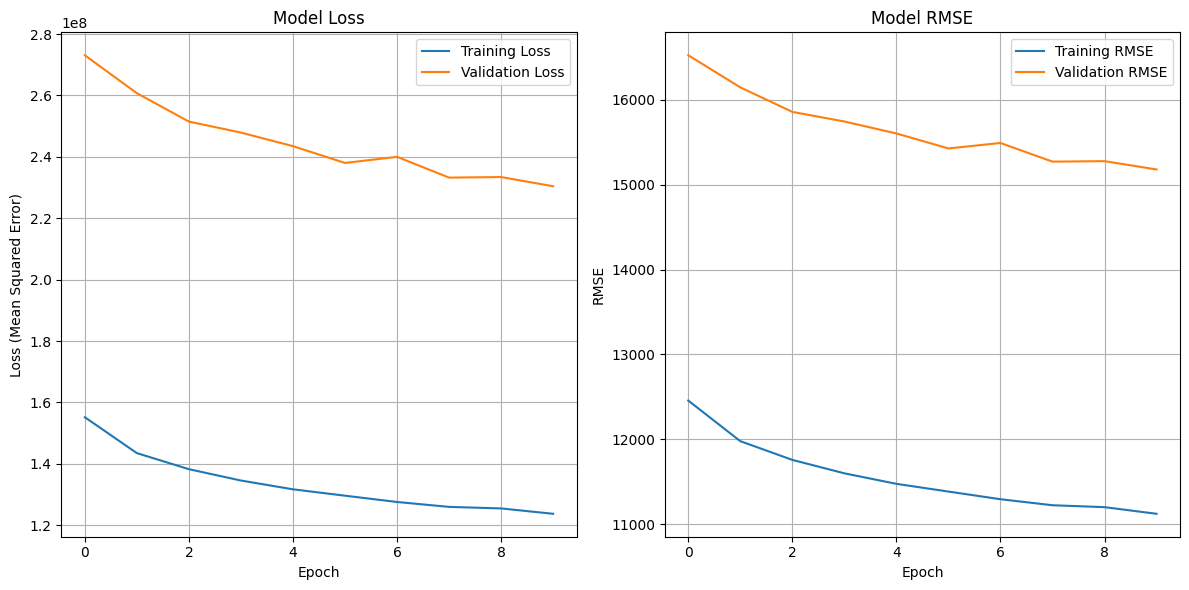

In [37]:
# Plot training history (loss and RMSE)
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)

# Plot RMSE
plt.subplot(1, 2, 2)
plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Model RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [38]:
#fitting the model
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
# Evaluate the model on the test data
loss, rmse = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss (MSE): {loss:.4f}')
print(f'Test RMSE: {rmse:.4f}')

# Make predictions on the test data
y_pred = model.predict(X_test).flatten()

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'Test R-squared: {r2:.4f}')

Test Loss (MSE): 116571304.0000
Test RMSE: 10796.8193
311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test R-squared: 0.2126


In [ ]:
import gradio as gr
import numpy as np

# Define a function to make predictions
def predict_grain_value(*args):
    # The input to the predict function should match the features used for training
    # Ensure the order of features matches the order in X.columns
    input_features = np.array(args).reshape(1, -1)

    # Preprocess the input features using the same preprocessor
    input_processed = preprocessor.transform(input_features)

    # Make a prediction
    prediction = model.predict(input_processed).flatten()[0]
    return prediction

# Create a list of Gradio inputs based on the feature columns
# Assuming the order of inputs in Gradio will match the order of feature_columns
gradio_inputs = []
for col in feature_columns:
    if col in numerical_features:
        # For numerical features, use a Number input
        gradio_inputs.append(gr.Number(label=col))
    elif col in categorical_features:
        # For categorical features, use a Textbox input
        # You might want to use Dropdown or Radio for specific categorical features
        gradio_inputs.append(gr.Textbox(label=col))
    else:
        # Handle other data types if necessary
        gradio_inputs.append(gr.Textbox(label=col))


# Create the Gradio interface
iface = gr.Interface(fn=predict_grain_value,
                     inputs=gradio_inputs,
                     outputs="number",
                     title=" Kiwanuka Grain Value Prediction",
                     description="Enter the features to predict the grain value.")

# Launch the interface
iface.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://1ac8c19160d66ffdf4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
